In [21]:
#! /usr/bin/python3 -i

import sys

import os

import wave
import numpy as np
import scipy as sp

from matplotlib import pyplot as  plt

import pprint
import struct

from copy import copy as copy

import pandas as pd

import time

import threading

In [22]:
dummy = wave.open("./Yamaha-TG100-Whistle-C5.wav")
dummy.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=53934, comptype='NONE', compname='not compressed')

In [23]:
dummy.getfp()

In [24]:
do = True
ii = 0

sound_dict_container = [{}, {}]
alt_sound_container = [copy(sound_dict_container) for _ in range(dummy.getnchannels())]

dummy.rewind()
sound_container = [[] for _ in range(dummy.getnchannels())]
while do:
    try:
        dummy.setpos(ii)
        temp_frame = dummy.readframes(1)
        
        start_id = 0
        for jj in range(dummy.getnchannels()):
            end_id = start_id  + dummy.getsampwidth()
            
            raw_bin = temp_frame[ start_id : end_id ]
            val = struct.unpack("<h", raw_bin)[0]
            
            sound_container[jj].append(val)
            
            if val <= 0:
                alt_sound_container[jj][0][dummy.tell()] = val
            else:
                alt_sound_container[jj][1][dummy.tell()] = val
            start_id = end_id
            
        if dummy.tell() == dummy.getnframes():
            do = False
        else:
            pass
    except:
        print(ii, dummy.getnframes())
        do = False
        
    ii += 1
    
print(len(sound_container))

2


In [25]:
df_sound = pd.DataFrame(np.matrix(sound_container).T, columns=["L", "R"])

In [26]:
df_sound.describe()

,L,R
count,53934.000000,53934.000000
mean,-1.301443,-1.116828
std,11010.183482,10706.828524
min,-32733.000000,-31659.000000
25%,-1469.000000,-1358.000000
50%,4.500000,-2.000000
75%,1463.750000,1361.000000
max,32625.000000,31321.000000


In [27]:
len(sound_container[0])

53934

In [70]:
negative_left_dict_container = list(alt_sound_container[1][0].values())

In [71]:
# np.unique(np.array(list(negative_left_dict_container.values()))).shape
# len(list(negative_left_dict_container.values()))
# np.median(np.array(list(negative_left_dict_container.values())))
np.array(negative_left_dict_container).mean()

-4387.732880559669

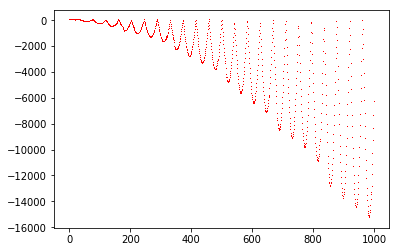

In [72]:
srt_val = 0
cut_val = int(1e3)

raw_list = negative_left_dict_container[srt_val:cut_val]

plt.plot(np.arange(len(raw_list)), raw_list, ',r')

In [ ]:
data = np.matrix(sound_container)

53934


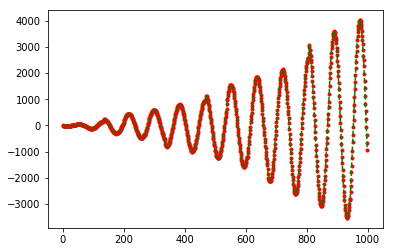

In [46]:
#plt.figure(figsize=(10,10))
print(dummy.getnframes())
max_sampler_id = int(1e3)
plt.plot(sound_container[0][:max_sampler_id], ".r")
plt.plot(sound_container[0][:max_sampler_id], "--g")

In [ ]:
aa_bb = np.fft.fft(sound_container[0]).real
max_sampler_id = int(1e3)
plt.plot(aa_bb[:max_sampler_id], ".r")
plt.plot(aa_bb[:max_sampler_id], "--g")

In [ ]:
aa_bb = np.fft.fft(sound_container[0]).imag
max_sampler_id = int(1e3)
plt.plot(aa_bb[:max_sampler_id], ".r")
plt.plot(aa_bb[:max_sampler_id], "--g")

In [ ]:
def wav_2_data(wav_obj_pointer, n_channels, samples_per_sec, bits_per_sample, chunksize , verbose=False):
    pass
    

In [ ]:
def stereo_chanel_data(wav_obj_pointer, verbose=False):
    wav_obj_pointer.rewind()
    
    signed_data_l = []
    signed_data_r = []

    total_frames = wav_obj_pointer.getnframes()
    amount = 0

    for frame_index in range(1 , total_frames - 1, 1):
        wav_obj_pointer.setpos(frame_index)

        try:
            l_int = struct.unpack("<h",wav_obj_pointer.readframes(1)[:2])[0]
            r_int = struct.unpack("<h",wav_obj_pointer.readframes(1)[-2:])[0]

        except:
            if verbose:
                print("error with frame \t" , frame_index , " N_CHANEL_DATA ERROR \n")
        else:
            signed_data_l.append(l_int)
            signed_data_r.append(r_int)

            if frame_index % (44100*20) == 0 and verbose:
                print(round((frame_index / total_frames) * 100, 4), "\t%")
                print(l_int, "\t", r_int)
                print(len(signed_data_l), "\t", len(signed_data_r))

    return [signed_data_l, signed_data_r]

In [ ]:
def mono_chanel_data(wav_obj_pointer, verbose=False):
    wav_obj_pointer.rewind()
    
    signed_data = []

    total_frames = wav_obj_pointer.getnframes()
    amount = 0

    for frame_index in range(1 , total_frames - 1, 1):
        wav_obj_pointer.setpos(frame_index)

        try:
            g_int = struct.unpack("<h",wav_obj_pointer.readframes(1)[:2])[0]
        except:
            if verbose:
                print("error with frame \t" , frame_index , " N_CHANEL_DATA ERROR \n")
        else:
            signed_data.append(g_int)

            if frame_index % (44100*20) == 0 and verbose:
                print(round((frame_index / total_frames) * 100, 4), "\t%")
                print(l_int, "\t", r_int)
                print(len(signed_data_l), "\t", len(signed_data_r))

    return signed_data

In [ ]:
def data_2_wav(data, specs, path, verbose=False):
    os.system("touch " + path)
    if verbose:
        print("creating destination file\t" + path)
    
    try:           
        output.close()
    except:
        if verbose:
            print("alocating file")
            
        output = wave.open(path, 'w')
    else:
        output = wave.open(path, 'w')
        if verbose:
            print("file already exists")
    
    if verbose:
            print("setting sound specs")
    
    specs[0] = 1
    specs[3] = len(data)
    
    output.setparams(specs)
    
    if verbose:
        print("formating data...")
        
    _carry = []
    for ii in list(data):
        _carry.append(struct.pack('<h', ii))

    _carry = b''.join(_carry)
    
    if verbose:
            print("writing...")
    
    output.writeframes(_carry)
    
    output.close()
    
    if verbose:
        print("DONE")

In [ ]:
def stereo_chanel_data(wav_obj_pointer, verbose=False):
    wav_obj_pointer.rewind()
    
    signed_data_l = []
    signed_data_r = []

    total_frames = wav_obj_pointer.getnframes()
    amount = 0

    for frame_index in range(1 , total_frames - 1, 1):
        wav_obj_pointer.setpos(frame_index)

        try:
            l_int = struct.unpack("<h",wav_obj_pointer.readframes(1)[:2])[0]
            r_int = struct.unpack("<h",wav_obj_pointer.readframes(1)[-2:])[0]

        except:
            if verbose:
                print("error with frame \t" , frame_index , " N_CHANEL_DATA ERROR \n")
        else:
            signed_data_l.append(l_int)
            signed_data_r.append(r_int)

            if frame_index % (44100*20) == 0 and verbose:
                print(round((frame_index / total_frames) * 100, 4), "\t%")
                print(l_int, "\t", r_int)
                print(len(signed_data_l), "\t", len(signed_data_r))

    return [signed_data_l, signed_data_r]

def mono_chanel_data(wav_obj_pointer, verbose=False):
    wav_obj_pointer.rewind()
    
    signed_data = []

    total_frames = wav_obj_pointer.getnframes()
    amount = 0

    for frame_index in range(1 , total_frames - 1, 1):
        wav_obj_pointer.setpos(frame_index)

        try:
            g_int = struct.unpack("<h",wav_obj_pointer.readframes(1)[:2])[0]
        except:
            if verbose:
                print("error with frame \t" , frame_index , " N_CHANEL_DATA ERROR \n")
        else:
            signed_data.append(g_int)

            if frame_index % (44100*20) == 0 and verbose:
                print(round((frame_index / total_frames) * 100, 4), "\t%")
                print(l_int, "\t", r_int)
                print(len(signed_data_l), "\t", len(signed_data_r))

    return signed_data

def sound_csv(files, basic_verbose = False, verbose=False):
    
    for index in range(len(files)):
        
        if verbose:
            print(files[index][1], "\t in execution at : \t 0 % and going")
        elif basic_verbose:
            print(files[index][1], "\t in execution with index\t", index)
        else:
            pass
            
        [sound_obj_ref , sound_name] = files[index]
        
        data_l_r = stereo_chanel_data(sound_obj_ref, verbose)
        
        carry_data = np.matrix(data_l_r).T
        
        sound_frame_data = pd.DataFrame(carry_data, columns=["left", "rigth"])
                
        sound_frame_data.to_csv( (DATA_PATH + sound_name[:-4] + ".csv"), sep='\t', encoding='utf-8')
        
        if verbose or basic_verbose:
            print("\n", sound_name , "\tDONE\n")

            
def meta_data(files, path, verbose=False):
    specs_matrix = []
    
    for index in range(len(files)):
        if verbose:
            print(files[index][1], "\t in transcription")
        else:
            pass
        
        [sound_obj_ref , sound_name] = files[index]
        
        specs_matrix.append([sound_name] + list(sound_obj_ref.getparams()))
        
        if verbose:
            print("\n", sound_name , "\tDONE\n")
    
    meta_sound_data = pd.DataFrame(specs_matrix, columns=
                                   ["file name", "nchannels", "sampwidth", "framerate", "nframes", "comptype", "compname"])
                
    meta_sound_data.to_csv( (path + "meta_sound_data.csv"), sep='\t', encoding='utf-8')
    
def data_2_wav(data, specs, path, verbose=False):
    os.system("touch " + path)
    if verbose:
        print("creating destination file\t" + path)
    
    try:           
        output.close()
    except:
        if verbose:
            print("alocating file")
            
        output = wave.open(path, 'w')
    else:
        output = wave.open(path, 'w')
        if verbose:
            print("file already exists")
    
    if verbose:
            print("setting sound specs")
    
    specs[0] = 1
    specs[3] = len(data)
    
    output.setparams(specs)
    
    if verbose:
        print("formating data...")
        
    _carry = []
    for ii in list(data):
        _carry.append(struct.pack('<h', ii))

    _carry = b''.join(_carry)
    
    if verbose:
            print("writing...")
    
    output.writeframes(_carry)
    
    output.close()
    
    if verbose:
        print("DONE")
        
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return [int(R), int(G), int(B)]

def Int2nM(x, rang_vals, verbose = False):
    [min_val, max_val] = rang_vals
    THz_o = 380.0
    THz_f = 750.0
    
    d = THz_f - THz_o
    d_val = max_val - min_val
    
#     x = x / (10 ** 12)
    
    ratio = (d / d_val)
    
    if verbose:
        print(x) 
        print(ratio)
    
    x = (x - min_val) * ratio + THz_o
    
    if verbose:
        print(x)
    
    return x